In [12]:
import pandas as pd
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing
from tqdm import tqdm

# Libraries for preprossing 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
vehicles = pd.read_csv('s3://ml-ai-bucket/vehicles_processed.csv')
vehicles.sample(10)

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
29486,46432,7314527452,285,37990,2020.0,20,8987,2,6,2,22244.0,0,2,3,0,8,11,4
51642,79068,7313758435,112,14000,1970.0,7,3626,1,8,2,86000.0,0,0,1,0,3,6,5
254916,388027,7309795896,375,23395,2020.0,30,13079,0,4,2,28567.0,0,0,3,2,0,1,46
37288,58105,7308565892,302,17500,2015.0,13,15957,2,6,2,103703.0,0,0,1,1,11,0,4
124527,188963,7303793480,44,21900,2017.0,4,9553,3,0,1,24190.0,0,0,1,3,4,1,19
19108,29442,7303874709,149,24995,2017.0,13,6658,0,6,2,98595.0,0,0,1,0,0,5,4
134459,203380,7306131064,145,24990,2012.0,23,10460,2,8,2,51724.0,0,0,1,0,9,0,22
164896,248840,7312904417,186,8995,2016.0,30,2525,1,0,2,99432.0,0,0,0,0,7,6,33
210122,319839,7311101820,211,7000,2011.0,13,12624,1,0,2,92682.0,0,0,0,0,7,6,37
113346,171912,7305835188,191,28981,2015.0,7,14140,0,8,2,88501.0,0,0,3,1,10,9,17


In [15]:
vehicles.head(10)

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27,7316814884,16,33590,2014.0,14,13873,2,8,2,57923.0,0,2,0,0,8,11,1
1,28,7316814758,16,22590,2010.0,7,14140,2,8,2,71229.0,0,2,0,0,8,1,1
2,29,7316814989,16,39590,2020.0,7,14163,2,8,2,19160.0,0,2,0,0,8,9,1
3,30,7316743432,16,30990,2017.0,38,16312,2,8,2,41124.0,0,2,0,0,8,9,1
4,31,7316356412,16,15000,2013.0,13,7107,0,6,2,128000.0,0,0,1,1,10,0,1
5,32,7316343444,16,27990,2012.0,14,13971,2,8,2,68696.0,0,2,3,0,8,0,1
6,33,7316304717,16,34590,2016.0,7,14173,2,6,2,29499.0,0,2,3,0,8,10,1
7,34,7316285779,16,35000,2019.0,38,15240,0,6,2,43000.0,0,0,3,0,10,5,1
8,35,7316257769,16,29990,2016.0,7,4540,2,6,2,17302.0,0,2,3,0,8,9,1
9,36,7316133914,16,38590,2011.0,7,4857,2,8,2,30237.0,0,2,1,0,7,9,1


In [16]:
vehicles.var()

Unnamed: 0      1.506690e+10
id              1.913923e+13
region          1.396681e+04
price           1.313244e+08
year            5.546349e+01
manufacturer    1.287350e+02
model           2.502691e+07
condition       7.627039e-01
cylinders       1.003787e+01
fuel            5.269736e-01
odometer        2.743513e+09
title_status    5.651928e-01
transmission    5.111486e-01
drive           1.471916e+00
size            7.599625e-01
type            1.324074e+01
paint_color     1.539549e+01
state           2.293875e+02
dtype: float64

In [5]:
features_list = ['year', 'cylinders', 'drive', "region","manufacturer", "model", "fuel","transmission","type",
                 "paint_color","state", "condition","title_status","size"]



In [6]:
vehicles.corr()


,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
Unnamed: 0,1.000000,-0.101660,-0.008244,0.025112,0.013319,-0.013451,0.005484,0.022977,-0.006603,-0.029103,0.009102,0.010118,-0.010263,0.044569,-0.000346,-0.008166,-0.019180,0.992223
id,-0.101660,1.000000,0.014193,-0.062067,-0.063437,0.041486,-0.008287,-0.027918,0.042633,-0.018137,0.039740,0.012131,-0.017167,0.016097,0.047518,0.023837,0.002121,-0.097132
region,-0.008244,0.014193,1.000000,-0.027111,-0.010022,0.000982,-0.002552,-0.003237,-0.004773,-0.003044,0.012330,-0.009444,-0.015773,-0.015256,-0.002839,0.003544,0.000726,-0.039392
price,0.025112,-0.062067,-0.027111,1.000000,0.376972,-0.046686,0.046656,0.149393,0.027689,-0.053047,-0.507561,-0.093346,0.268379,0.082647,-0.200744,0.045382,0.022138,0.027397
year,0.013319,-0.063437,-0.010022,0.376972,1.000000,0.027084,0.027512,0.084215,-0.169808,0.115769,-0.354459,0.016189,0.139667,0.065105,-0.097356,0.011873,0.002865,0.012736
manufacturer,-0.013451,0.041486,0.000982,-0.046686,0.027084,1.000000,0.003214,-0.025033,-0.062493,-0.029405,0.015638,0.017777,0.005182,0.092056,0.030943,0.038639,0.008695,-0.011461
model,0.005484,-0.008287,-0.002552,0.046656,0.027512,0.003214,1.000000,0.015761,0.052316,0.068128,0.004407,-0.012297,0.029981,0.066004,-0.034795,-0.103531,0.021368,0.005498
condition,0.022977,-0.027918,-0.003237,0.149393,0.084215,-0.025033,0.015761,1.000000,-0.002734,0.143484,-0.192282,-0.053680,0.353052,-0.089529,-0.070348,0.043578,-0.003352,0.024327
cylinders,-0.006603,0.042633,-0.004773,0.027689,-0.169808,-0.062493,0.052316,-0.002734,1.000000,-0.156824,0.123904,0.055140,-0.070566,0.310644,0.231585,-0.015490,0.025098,-0.005016
fuel,-0.029103,-0.018137,-0.003044,-0.053047,0.115769,-0.029405,0.068128,0.143484,-0.156824,1.000000,-0.215241,-0.024944,0.279151,-0.108882,-0.069506,-0.070571,-0.033151,-0.026997


Text(0.5, 1.0, 'Correlation bewtween features')

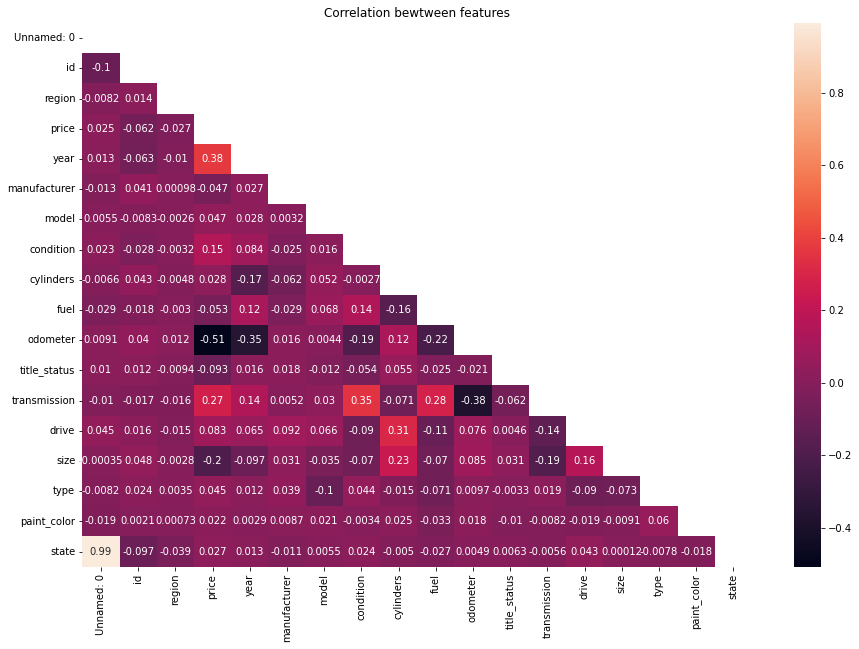

In [19]:
mask = np.triu(np.ones_like(vehicles.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(vehicles.corr(),mask=mask, annot=True, ax= ax)
ax.set_title("Correlation bewtween features")

In [26]:
# Removing highly correlated features
corr_df = vehicles.corr().abs()
# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
#print(tri_df)

to_drop = [ c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)

[]


In [25]:
#Dropping some of the columns

vehicles.drop(columns=["Unnamed: 0", "id", "state"], inplace=True)

In [9]:
# normalizing pricing data in vehicles.
price_mean = vehicles["price"].mean()
price_std = vehicles["price"].std()
vehicles["price"] = (vehicles["price"] - price_mean)/price_std

# Scaling numerical data
ss = StandardScaler()
vehicles["odometer"] = ss.fit_transform(np.array(vehicles["odometer"]).reshape(-1,1))
vehicles["year"] = ss.fit_transform(np.array(vehicles["year"]).reshape(-1,1))
vehicles["manufacturer"] = ss.fit_transform(np.array(vehicles["manufacturer"]).reshape(-1,1))
vehicles["condition"] = ss.fit_transform(np.array(vehicles["condition"]).reshape(-1,1))
vehicles["cylinders"] = ss.fit_transform(np.array(vehicles["cylinders"]).reshape(-1,1))
vehicles["fuel"] = ss.fit_transform(np.array(vehicles["fuel"]).reshape(-1,1))
vehicles["title_status"] = ss.fit_transform(np.array(vehicles["title_status"]).reshape(-1,1))
vehicles["transmission"] = ss.fit_transform(np.array(vehicles["transmission"]).reshape(-1,1))
vehicles["drive"] = ss.fit_transform(np.array(vehicles["drive"]).reshape(-1,1))
vehicles["size"] = ss.fit_transform(np.array(vehicles["size"]).reshape(-1,1))
vehicles["region"] = ss.fit_transform(np.array(vehicles["region"]).reshape(-1,1))
vehicles["type"] = ss.fit_transform(np.array(vehicles["type"]).reshape(-1,1))
vehicles["paint_color"] = ss.fit_transform(np.array(vehicles["paint_color"]).reshape(-1,1))
vehicles.describe()


,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
count,279813.000000,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,279813.000000,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05,2.798130e+05
mean,212854.086858,-3.778316e-14,-3.414202e-16,-4.905896e-15,-1.003695e-14,9084.581095,8.362621e-14,1.236133e-14,-1.279235e-13,-1.168449e-16,6.463458e-15,-7.456464e-15,1.959271e-15,-8.635808e-15,1.006976e-14,-2.382673e-14
std,122747.317032,1.000002e+00,1.000000e+00,1.000002e+00,1.000002e+00,5002.690087,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,27.000000,-1.644376e+00,-1.260777e+00,-1.260753e+01,-1.633200e+00,0.000000,-1.286484e+00,-1.130772e+00,-2.804467e+00,-1.494845e+00,-2.085034e-01,-4.722346e-01,-1.338429e+00,-5.459009e-01,-1.708609e+00,-1.552556e+00
25%,107499.000000,-9.505255e-01,-8.676601e-01,-2.541689e-01,-9.281137e-01,4910.000000,-1.286484e+00,-1.130772e+00,-4.937375e-02,-8.696068e-01,-2.085034e-01,-4.722346e-01,-1.338429e+00,-5.459009e-01,-8.841558e-01,-1.042834e+00
50%,210687.000000,3.101937e-02,-2.568232e-01,1.486580e-01,-2.230271e-01,9104.000000,-1.414381e-01,1.317524e-01,-4.937375e-02,-7.536815e-02,-2.085034e-01,-4.722346e-01,3.100723e-01,-5.459009e-01,2.151149e-01,-2.338823e-02
75%,319383.000000,8.094860e-01,6.943372e-01,5.514849e-01,9.227386e-01,13776.000000,1.003608e+00,7.630148e-01,-4.937375e-02,6.944330e-01,-2.085034e-01,-4.722346e-01,1.134323e+00,6.012081e-01,7.647502e-01,9.960572e-01
max,426879.000000,1.765646e+00,3.231928e+00,1.357139e+00,1.892233e+00,17589.000000,4.438744e+00,2.656802e+00,2.705720e+00,2.979322e+00,6.442275e+00,2.325182e+00,1.134323e+00,4.042535e+00,1.589203e+00,1.505780e+00


In [17]:
vehicles.to_csv("s3://ml-ai-bucket/vehicles_feature_engineered.csv")